In [45]:
import numpy as np
import subprocess
import os

DELETE_TEMP = False

ORCA_PATH = "/home/gui/orca_6_0_1/"
ORCA_EXEC = ORCA_PATH+"orca"

SSCC_INPUT = "acetamide_sscc.inp"
SSCC_OUTPUT = "acetamide_sscc.property.txt"
NMR_INPUT = "acetamide_nmr.inp"
NMR_OUTPUT = "acetamide_nmr.property.txt"
NMR_SPEC_INPUT = "acetamide.nmrspec"
NMR_GBW_FILE = "acetamide_nmr.gbw"

# creat input file for spin-spin coupling constants 
sscc_inp = '''
!B3LYP 6-31G*

*xyz 0 1
  O          -0.46269991708219      1.26347851821489     -0.25636278872658
  N           0.71857458246431     -0.66376635191250      0.05627510754746
  C          -0.44155497151501      0.05063526848618     -0.08649725038021
  C           2.02871261396007     -0.03987380453501      0.02291345938059
  C          -1.72204540274477     -0.77251562482314     -0.02173604985495
  H           0.66014801076857     -1.66095160782806      0.19945565079693
  H           2.55818083398569     -0.16816058626330      0.97543308336928
  H           1.87254650126915      1.02501026444747     -0.15753197370456
  H           2.64664219040216     -0.45496754358063     -0.78286182010502
  H          -2.34765828014480     -0.38714532433314      0.78968161181891
  H          -2.27740323351236     -0.63290341950480     -0.95471645016362
  H          -1.55704292785082     -1.84383978836795      0.13564742002177
* 

%eprnmr
 Nuclei = all H {ssall}
end
'''

with open(SSCC_INPUT,"w") as f:
    f.write(sscc_inp)

# run orca for spin-spin couling constants
subprocess.run([ORCA_EXEC, SSCC_INPUT], stdout = subprocess.PIPE, stderr = subprocess.PIPE)

CompletedProcess(args=['/home/gui/orca_6_0_1/orca', 'acetamide_sscc.inp'], returncode=0, stdout=b"\n                                 *****************\n                                 * O   R   C   A *\n                                 *****************\n\n                                            #,                                       \n                                            ###                                      \n                                            ####                                     \n                                            #####                                    \n                                            ######                                   \n                                           ########,                                 \n                                     ,,################,,,,,                         \n                               ,,#################################,,                 \n                          ,,##################

In [46]:
# create input file for NMR shieldings
nmr_inp = '''
!B3LYP 6-31G* NMR
*xyz 0 1
  O          -0.46269991708219      1.26347851821489     -0.25636278872658
  N           0.71857458246431     -0.66376635191250      0.05627510754746
  C          -0.44155497151501      0.05063526848618     -0.08649725038021
  C           2.02871261396007     -0.03987380453501      0.02291345938059
  C          -1.72204540274477     -0.77251562482314     -0.02173604985495
  H           0.66014801076857     -1.66095160782806      0.19945565079693
  H           2.55818083398569     -0.16816058626330      0.97543308336928
  H           1.87254650126915      1.02501026444747     -0.15753197370456
  H           2.64664219040216     -0.45496754358063     -0.78286182010502
  H          -2.34765828014480     -0.38714532433314      0.78968161181891
  H          -2.27740323351236     -0.63290341950480     -0.95471645016362
  H          -1.55704292785082     -1.84383978836795      0.13564742002177
* 
'''

with open(NMR_INPUT,"w") as f:
    f.write(nmr_inp)

# run orca for NMR shieldings
subprocess.run([ORCA_EXEC, NMR_INPUT], stdout = subprocess.PIPE, stderr = subprocess.PIPE)

CompletedProcess(args=['/home/gui/orca_6_0_1/orca', 'acetamide_nmr.inp'], returncode=0, stdout=b"\n                                 *****************\n                                 * O   R   C   A *\n                                 *****************\n\n                                            #,                                       \n                                            ###                                      \n                                            ####                                     \n                                            #####                                    \n                                            ######                                   \n                                           ########,                                 \n                                     ,,################,,,,,                         \n                               ,,#################################,,                 \n                          ,,###################

In [47]:
ORCA_NMRSPC = ORCA_PATH+"orca_nmrspectrum"

# create input file for orca_nmrspectrum
nmr_spec_inp = '''
NMRShieldingFile = "acetamide_nmr"
NMRCouplingFile = "acetamide_sscc"
NMRSpecFreq = 80.00
PrintLevel = 0
NMRCoal = 1.0
NMRREF[1] 31.77
NMRREF[6] 188.10
NMREquiv
1 {6 7 8} end
2 {9 10 11} end
end
END
'''

with open(NMR_SPEC_INPUT,"w") as f:
    f.write(nmr_spec_inp)

# run orca_nmrspectrum
subprocess.run([ORCA_NMRSPC, NMR_GBW_FILE, NMR_SPEC_INPUT], stdout = subprocess.PIPE, stderr = subprocess.PIPE) # the output shown here is WRONG!

CompletedProcess(args=['/home/gui/orca_6_0_1/orca_nmrspectrum', 'acetamide_nmr.gbw', 'acetamide.nmrspec'], returncode=0, stdout=b'Reading the GBW file acetamide_nmr.gbw              ... ... done.\nReading the input file acetamide.nmrspec           ... ... done.\n--------------------------------------------------------------------------- \nNMR Spectrum simulated based on computed shieldings and coupling constants  \n--------------------------------------------------------------------------- \n\n NMR Shielding File: acetamide_nmr.property.txt \n NMR Couplings File: acetamide_sscc.property.txt \n Simulated spectrometer frequency :      80.00 MHz \n Corresponding spectrometer fieldstrength :       1.88 Tesla \n User-defined shielding reference value for nuclei of type 1 :    31.770000 ppm \n User-defined shielding reference value for nuclei of type 6 :   188.100000 ppm \n Lines coalesce below   1.0000 Hz difference \n Printlevel : 0  NAtoms 12 \n\nAtom 0, diagonalizing spin Hamiltonian of 

In [1]:
# process the output for plotting
import json

output_file = "output"
hydrogen_data = []

with open(output_file,"r") as f:
    lines = f.readlines()

inside_hydrogen_section = False
for i, line in enumerate(lines):
    if "NMR Peaks for atom type 1" in line:
        inside_hydrogen_section = True
        continue
    if inside_hydrogen_section:
        parts = line.split()        
        if len(parts) == 3:
            try:
               atom, shift_ppm, rel_intensity = int(parts[0]), float(parts[1]), float(parts[2])
               hydrogen_data.append((shift_ppm, rel_intensity))
            except ValueError:
               print(f"Skipping line due to parsing error.")
        if "NMR Peaks for atom type" in line:
            inside_hydrogen_section = False
            break
    
if not hydrogen_data: 
    print("No hydrogen data found.")
else:
    print(f"Extracted {len(hydrogen_data)} hydrogen peaks.")

with open("hydrogen_data.json", "w") as json_file:
    json.dump(hydrogen_data, json_file)

Skipping line due to parsing error.
Extracted 7 hydrogen peaks.


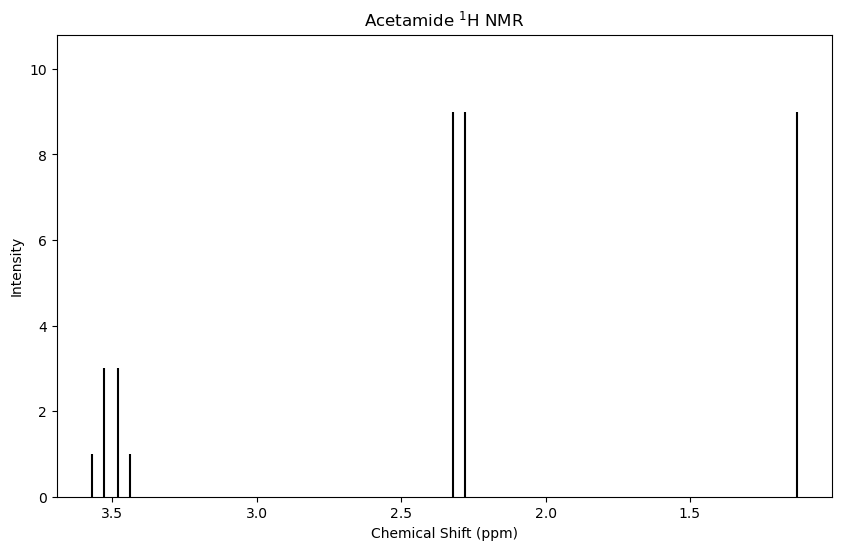

Wrong SpecType!


SystemExit: 1

/home/gui/anaconda3/lib/python3.12/site-packages/IPython/core/interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [2]:
# plot the NMR spectrum
from importlib import reload
import ConvolutionPlot
                       
reload(ConvolutionPlot) 
from ConvolutionPlot import * 

ConvPlot(SpecType = 4, gamma = 0.0, PlotTitle = "Acetamide $^1$H NMR", 
            DataFileNames=["output"])